# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [ ]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [ ]:
######### For Julien #########
# Load data
datadir = "/media/data/data.tsv.gz"
tsv_read = pd.read_csv(datadir, sep='\t', error_bad_lines=False,warn_bad_lines=False)

tsv_read.head()

FileNotFoundError: ignored

In [ ]:
# Load data
datadir = "/media/data/data.tsv.gz"
tsv_read = pd.read_csv(datadir, sep='\t', error_bad_lines=False,warn_bad_lines=False)

tsv_read.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

In [ ]:
#2.1 Check unique keys 
uniqueValues = tsv_read['id'].nunique()
print("There are {} unique values, and {} rows in our original dataset.".format(uniqueValues, tsv_read.shape[0]))
tsv_read.sort_values("id", inplace = True)
data_after_2_1=tsv_read.drop_duplicates(subset=['id'])
print("There are {} unique values, and {} rows after 2.1.".format(uniqueValues, data_after_2_1.shape[0]))

There are 13488 unique values, and 13497 rows in our original dataset.
There are 13488 unique values, and 13488 rows after 2.1.


In [ ]:
#2.2
data=data_after_2_1.copy()

print(data.shape)
# Verify that number of motorcycles are consistent over the two contracts.
data = data.loc[data[['baseline_motorcycle1','update_motorcycle1']].count(axis='columns')%2 == 0]
data = data.loc[data[['baseline_motorcycle2','update_motorcycle2']].count(axis='columns')%2 == 0]
data = data.loc[data[['baseline_motorcycle3','update_motorcycle3']].count(axis='columns')%2 == 0]
data = data.loc[data[['baseline_motorcycle4','update_motorcycle4']].count(axis='columns')%2 == 0]
columns = ['baseline_motorcycle1','update_motorcycle1','baseline_motorcycle2','update_motorcycle2',
           'baseline_motorcycle3','update_motorcycle3','baseline_motorcycle4','update_motorcycle4']

# Remove rows where number of motorcycles incorrect
data_after_2_2 = data.loc[data['motorcycle_count'].mul(2) == data[columns].count(axis='columns')]
print(data_after_2_2.shape)


(13488, 11)
(13488, 11)


In [ ]:
#2.3 
cols = ['baseline_motorcycle1','update_motorcycle1','baseline_motorcycle2','update_motorcycle2',\
                'baseline_motorcycle3','update_motorcycle3','baseline_motorcycle4','update_motorcycle4']

print("The mean values of each baseline and update:\n\n",data_after_2_2[cols].mean())
print("\nThe median values of each baseline and update:\n\n",data_after_2_2[cols].median())

#remove outliers
threshold = 1.5
data=data_after_2_2

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data_after_2_3 = data[~((data[cols] < (Q1 - threshold * IQR)) |(data[cols] > (Q3 + threshold * IQR))).any(axis=1)]

print("\n[WITHOUT OUTLIERS] The mean values of each baseline and update:\n\n",data_after_2_3[cols].mean())
print("\n[WITHOUT OUTLIERS] The median values of each baseline and update:\n\n",data_after_2_3[cols].median())

removed_rows = data_after_2_2.shape[0]-data_after_2_3.shape[0]
print("\n\n We have removed {} rows!".format(removed_rows))

The mean values of each baseline and update:

 baseline_motorcycle1    7.413998e+14
update_motorcycle1      7.413998e+14
baseline_motorcycle2    6.732597e+04
update_motorcycle2      9.227763e+04
baseline_motorcycle3    6.765732e+04
update_motorcycle3      9.284941e+04
baseline_motorcycle4    6.782798e+04
update_motorcycle4      9.337428e+04
dtype: float64

The median values of each baseline and update:

 baseline_motorcycle1    56341.5
update_motorcycle1      82397.5
baseline_motorcycle2    56157.5
update_motorcycle2      82061.0
baseline_motorcycle3    58821.0
update_motorcycle3      85645.0
baseline_motorcycle4    68181.0
update_motorcycle4      93387.5
dtype: float64

[WITHOUT OUTLIERS] The mean values of each baseline and update:

 baseline_motorcycle1    62723.617359
update_motorcycle1      87591.231270
baseline_motorcycle2    62343.796951
update_motorcycle2      87234.083116
baseline_motorcycle3    64265.034110
update_motorcycle3      89330.563228
baseline_motorcycle4    65508.52

We have removed the outliers according to the definition of an outlier in 2.3.

## 2.4

In case there are outliers and we have to keep those, we would choose the median for summarizing the data since it is more robust than the mean value when it comes to representing the given data. The median value choosen by its relative rank, not by the value itself. Thus, it is less affected by the outliers and more representative of the majority of the data.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

In [ ]:
#3.1
data=data_after_2_3.copy()
data['baseline_average']=data[["baseline_motorcycle1","baseline_motorcycle2","baseline_motorcycle3","baseline_motorcycle4"]].mean(axis=1)
data['update_average']=data[["update_motorcycle1","update_motorcycle2","update_motorcycle3","update_motorcycle4"]].mean(axis=1)
data['diff_average']=data['update_average']-data['baseline_average']
data_after_3_1=data

NameError: ignored

In [ ]:
data.head(10)

## 3.2

Another way of aggregating could be picking the motorcycle with the highest update motorcycle value. In other words, select the vehicle that the user used the most. We know that the more a vehicle has been driven, the higher the cost will be to insure it. People will then tend to lie more on their vehicle they have driven the most. If our assumption is correct, we will then be able to identify better the distribution of the updates from lying people because we will not average them from all motrocycles from a single policy. Hence, this aggregation would be better for our study.  


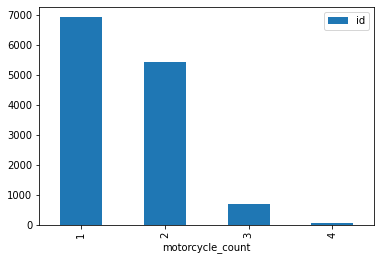

In [ ]:
#3.3
data=data_after_3_1.copy()
data.groupby("motorcycle_count").count().plot(y="id",kind="bar")
plt.title('Number of policies with x number of motorcycles')
plt.ylabel('Number of occurances')

In [ ]:
data_after_3_1.head(3)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0


In [ ]:
#3.4
data=data_after_3_1.copy()
mean=data['update_average'].mean()
std=data['update_average'].std()
print('The mean of the update_average values is {}'.format(mean))
print('The standard deviation of the update_average values is {}'.format(std))

The mean of the update_average values is 87751.72319467853
The standard deviation of the update_average values is 43932.875974065406


In [ ]:
#3.5 
data=data_after_3_1.copy()
cols = ['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']
data_mean=data[data.motorcycle_count==4].groupby("motorcycle_count").agg('mean')[cols].mean(axis=1)
data_std=data[data.motorcycle_count==4].groupby("motorcycle_count").agg('std')[cols].std(axis=1)

print('Considering only policies with 4 motorcycles insured, the mean is {} \nand the standard deviation \
is {} per motorcycle in the updated contract.'.format(data_mean.iloc[0],data_std.iloc[0]))

Considering only policies with 4 motorcycles insured, the mean is 97989.19078947368 
and the standard deviation is 10642.121097807214 per motorcycle in the updated contract.


# 3.6

Based on the results of 3.4 and 3.5, we can see that policies with 4 motorcycles have a 12% higher mean than the entire dataset and a 75% lower standard deviation. The kilometers reported tend to be higher but more centered around the mean when a policy has 4 vehicles. 

In the first case, a motorcycle that is insured among others from the same policy will have less weight in the average than a motorcycle that is uniquely insured. 

In the second case each motorcycle is a data point. This means that its contribution to the mean will be the same regardless of the motorcycle_count variable. This case could affect our results if people with 4 motorcycles tend to lie more or less than others. Another possibility is that people might lie more for one motorcycle in particular, per example the motorcycle that he uses the most.  

Having the results of 3.4 and 3.5 in mind, by giving less weight to the odometers of motorcycles from multi-motorcycle owners (first case) we will have a lower mean and a higher standard deviation compared to considering every motorcycle as a data point (second case). 

**From Martin:** *What do you mean with "these values" in the last paragraph? I agree with your final conclusion about the mean and std. I think after reading it again it makes for sense for me.*

**Answer from Donggyun:** I think they refer to the more used motorcycles of the owners of multiples. I changed some words based on my opinion.

**Final change from Julien:** *Thanks for the feedback, i have changed the text.*


### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

In [ ]:
# 4.1 
data = data_after_3_1.copy()
signed_bottom = data.loc[data['condition'] == 'Sign Bottom']
signed_top = data.loc[data['condition'] == 'Sign Top']

bottom_mean = signed_bottom['update_average'].mean()
top_mean = signed_top['update_average'].mean()
bottom_std = signed_bottom['update_average'].std()
top_std = signed_top['update_average'].std()

print('For Update : \nTop mean : {} and Top std : {} \nBottom mean : {} and Bottom std : {}\
'.format(top_mean,top_std,bottom_mean,bottom_std))

For Update : 
Top mean : 81964.87611663157 and Top std : 43510.02971818005 
Bottom mean : 93746.1458853192 and Bottom std : 43566.81232417591


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


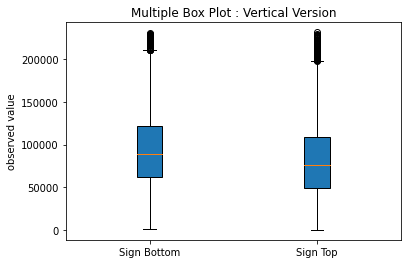

In [ ]:
# 4.1 PLOT
bottom_np = signed_bottom['update_average'].to_frame().to_numpy().flatten()
top_np = signed_top['update_average'].to_frame().to_numpy().flatten()
all_data = [bottom_np,top_np]

# MultipleBoxplot
plt.boxplot(all_data, vert=True, patch_artist=True, labels=['Sign Bottom', 'Sign Top']) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

In [ ]:
# 4.2
stat,p = stats.ttest_ind(signed_bottom['update_average'],signed_top['update_average'])
print("Test of significance of different update_average means in the cases bottom and top sign:\n" +
      "Students T-test gives p = {}.\n".format(p) + 
      "This gives a strong indication of the distributions having significantly different means.\n"+
     "In other words the hypothesis that there is NO difference between top and bottom sign can be rejected.")

Test of significance of different update_average means in the cases bottom and top sign:
Students T-test gives p = 2.0405349629928552e-53.
This gives a strong indication of the distributions having significantly different means.
In other words the hypothesis that there is NO difference between top and bottom sign can be rejected.


### 4.3
The following assumes the integrity of the data.

The results show that given a policy has been signed at the top, the mean of the update_average is lower compared to a policy signed at the bottom. The variance for both groups are approximately equal. The difference of the means is statistically significant, using the students T-test a p value of 2e-53 was calculated, thus it is highly unlikely that the means are equal. In other words, the hypothethis that there is NO difference between top and bottom sign can be rejected according to the T-test.

Looking at the box plot in 4.1, one can observe a big overlap between the upper and lower quartiles. Therefor one might infer that they are likely to have the same mean. However, given that the usage of stats.ttest_ind which performed the T-test is correct, the statisical test is a stronger indication.

**As a conclusion:** Signing at the top makes a policy-taker report a lower update_average on average. 

**Question:** Does this indicate dishonesty?

Since a lower mileage is beneficial for the policy-taker, the dishonest choice would be to report a lower mileage. In that sense a person is more dishonest when signing at the top. This is indeed unexpected, as one might intuitively guess that being reminded of your morals make you stick to them more strongly. There might be a reverse psychology at play making people more prone to lying if told they should not. Maybe the signing at the top is a reminder that lying would be a utility, and people would rather have a lower premium than a high level of honor. 


## 4.4

Since:
- all the baseline contracts are signed at bottom
-  the assignment of the different contracts (sign at the top vs. sign at the bottom) was done at random

we can assume that the partition "baseline top" and "baseline bottom" creates two equally representative subsets of the hole baseline contracts dataset, and as a consequence each subset should have the same distribution.  
Therefore we expect:
- Visually, two similar plots of the two subsets with similar mean and standard deviation
- Statistically, a high p-value, which leads us to fail rejecting the Null-Hypotethis of NO difference.

In [ ]:
# 4.5
bottom_mean = signed_bottom['baseline_average'].mean()
top_mean = signed_top['baseline_average'].mean()
bottom_std = signed_bottom['baseline_average'].std()
top_std = signed_top['baseline_average'].std()

print('For Basline : \nTop mean : {} and Top std : {} \nBottom mean : {} and Bottom std : {}\
'.format(top_mean,top_std,bottom_mean,bottom_std))

For Basline : 
Top mean : 55956.959738532576 and Top std : 41638.53890061223 
Bottom mean : 70111.30810719485 and Bottom std : 41567.993745441585


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


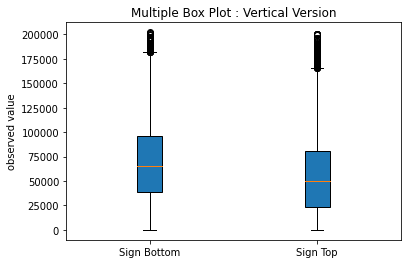

In [ ]:
# 4.5 PLOT
bottom_np = signed_bottom['baseline_average'].to_frame().to_numpy().flatten()
top_np = signed_top['baseline_average'].to_frame().to_numpy().flatten()
all_data = [bottom_np,top_np]

#MultipleBoxplot
plt.boxplot(all_data, vert=True, patch_artist=True, labels=['Sign Bottom', 'Sign Top']) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

In [ ]:
# 4.6 
stat,p = stats.ttest_ind(signed_bottom['baseline_average'],signed_top['baseline_average'])
print("Test of significance of different baseline_average means in the cases bottom and top sign:\n" +
      "Students T-test gives p = {}.\n".format(p) + 
      "This gives a strong indication of the distributions having significantly different means.\n"+
     "In other words the hypothesis that there is NO difference between top and bottom sign can be rejected.")

Test of significance of different baseline_average means in the cases bottom and top sign:
Students T-test gives p = 6.0551385729255415e-83.
This gives a strong indication of the distributions having significantly different means.
In other words the hypothesis that there is NO difference between top and bottom sign can be rejected.


## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

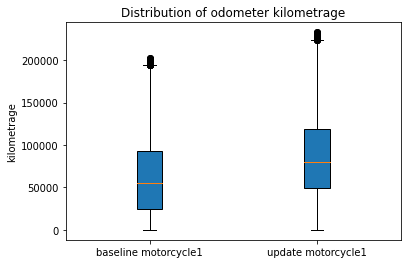

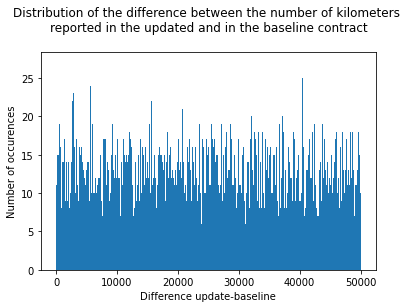

In [ ]:
# 5.1 and 5.2 
data_after_3 = data_after_3_1.copy()
update_motorcycle1_data = data_after_3['update_motorcycle1'].to_frame().to_numpy().flatten()
baseline_motorcycle1_data = data_after_3['baseline_motorcycle1'].to_frame().to_numpy().flatten()
diff_motorcycle1_data = update_motorcycle1_data-baseline_motorcycle1_data
all_data = [baseline_motorcycle1_data,update_motorcycle1_data]

#MultipleBoxplot
plt.boxplot(all_data, vert=True, patch_artist=True, labels=['baseline motorcycle1','update motorcycle1']) 
plt.ylabel('kilometrage')
plt.title('Distribution of odometer kilometrage')
plt.show()

#HistogramPlot
plt.hist(diff_motorcycle1_data, bins=1000) 
plt.ylabel('Number of occurences')
plt.xlabel('Difference update-baseline')
plt.title('Distribution of the difference between the number of kilometers \nreported in the updated and in the baseline contract\n')
plt.show()


## 5.3 
By plotting the histogram of the difference between the update and the baseline kilometrage from real odometer readings we would expect to see a distribution:
- right-skewed
- with a peak on the left side

because we assume that:
- the higher is the difference of the kilometrage, the rarer it will be  
- it exists a value that is most common then the others

However what we obtain by plotting the data is completely different:
- The distribution is not right-skewed, instead it has a uniform-like distribution over the values. This means that there is no difference between really high values and the others.
- The distribution suddenly stops around 50000 km instead of having a tail. 

**Conclusion**: We can conclude that the data is unlikely to have originated from real odometer readings.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

In [ ]:
# 6.1
data = data_after_3_1.copy()
baseline_motorcycle1_data = data['baseline_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()
update_motorcycle1_data = data['update_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()


Text(0.5, 1.0, 'Baseline: Distribution of permutations of last three digits')

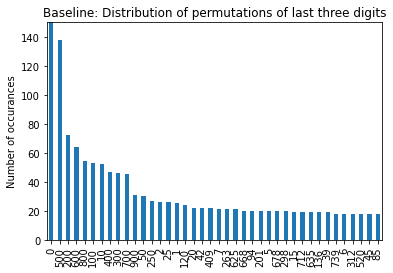

In [ ]:
# 6.1 plot baseline_motorcycle1
baseline_motorcycle1_data.head(40).plot.bar()
plt.ylim((0,150))
plt.ylabel('Number of occurances')
plt.title('Baseline: Distribution of permutations of last three digits')


Text(0.5, 1.0, 'Updated: Distribution of permutations of last three digits')

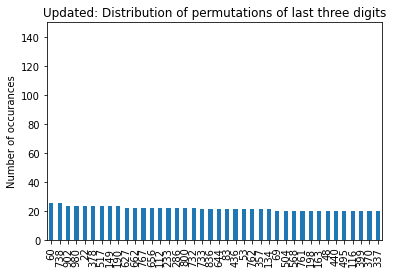

In [ ]:
# 6.1 plot update_motorcycle1
update_motorcycle1_data.head(40).plot.bar()
plt.ylim((0,150))
plt.ylabel('Number of occurances')
plt.title('Updated: Distribution of permutations of last three digits')

## 6.2 discussion


For the baseline, the mean frequency of a combination is 13.05, and the standard deviation is 42.81. The maximum frequency is 1349 and the lowest is 2. We have a big standard deviation, and thanks to the plot we can see that we have a large frequency for numbers that finishes with 00. It seems that we have a right-skewed distribution. 

For the update, the mean frequency of a combination is 13, and the standard deviation is 3.65. The maximum frequency is 25 and the lowest is 3. We can see that we have an upper bound for the maximum and the standard deviation is much lower than for the baseline. It seems that we have a data generated by a uniform distribution. 

## 6.3 discussion

In the baseline distribution we observe a spike for numbers finishing with zeros. This seems consistent with the way it was collected, because usually people tend to round the last digits. In the updated distribution, we observe however a "uniform"-like distribution. Zeroes are as frequent as the 9 others digits. Maybe the data could have been randomly generated and not rounded as a human would do. 

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

In [ ]:
# 7.1
# Load fonts data and merge with cleaned contract data 
datadir = "/media/data/fonts.csv"
fonts = pd.read_csv(datadir)
data = data_after_3_1.copy()
data_w_font = data.merge(fonts, how='inner', on='id')

In [ ]:
# 7.2
helvetica = data_w_font.loc[data_w_font['font'] == "Helvetica"]
arial = data_w_font.loc[data_w_font['font'] == "Arial"]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


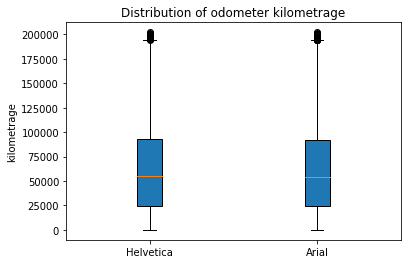

(6529, 15) (6525, 15)


In [ ]:
# 7.2 Plot
n_bins = 50
all_data = [helvetica['baseline_motorcycle1'].to_numpy().flatten(),arial['baseline_motorcycle1'].to_numpy().flatten()]

plt.boxplot(all_data, vert=True, patch_artist=True, labels=['Helvetica', 'Arial']) 
plt.ylabel('kilometrage')
plt.title('Distribution of odometer kilometrage')
plt.show()
print(helvetica.shape,arial.shape)


In [ ]:
# 7.3
data_after_3 = data_after_3_1.copy()
helvetica_baseline = helvetica['baseline_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()
helvetica_update = helvetica['update_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()
arial_baseline = arial['baseline_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()
arial_update = arial['update_motorcycle1'].astype(str).str[-3:].astype(int).value_counts()

## Plotting the results
Proceeding the results are plotted with two different plots:
- **Histogram**: Shows the distribution of selected last 3 digits (from 000 to 999).
- **Bar plot**: Shows the most popular last 3 digits more clearly.

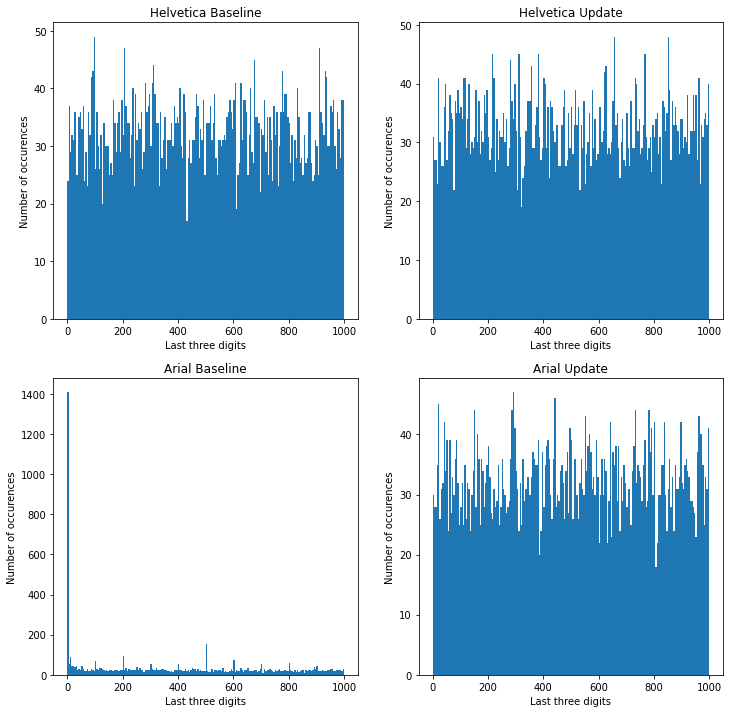

In [ ]:
# 7.3 Different plots suggestion
helvetica_baseline = helvetica['baseline_motorcycle1'].astype(str).str[-3:].astype(int)
helvetica_update = helvetica['update_motorcycle1'].astype(str).str[-3:].astype(int)
arial_baseline = arial['baseline_motorcycle1'].astype(str).str[-3:].astype(int)
arial_update = arial['update_motorcycle1'].astype(str).str[-3:].astype(int)
n_bins=200
figure,axes=plt.subplots(2,2,figsize=(12,12))
axes[0,0].hist(helvetica_baseline,bins=n_bins);
axes[0,0].set_title('Helvetica Baseline')
axes[0,1].hist(helvetica_update,bins=n_bins);
axes[0,1].set_title('Helvetica Update')
axes[1,0].hist(arial_baseline,bins=n_bins);
axes[1,0].set_title('Arial Baseline')
axes[1,1].hist(arial_update,bins=n_bins);
axes[1,1].set_title('Arial Update')

for i in range(2):
  for j in range(2):
    axes[i,j].set_ylabel('Number of occurences')
    axes[i,j].set_xlabel('Last three digits')

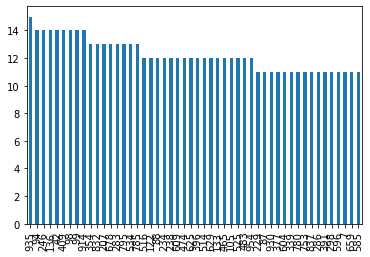

In [ ]:
# 7.3
helvetica_baseline.head(50).plot.bar() 
plt.set_title('Helvetica baseline')


The 000 value is used only 3 times.



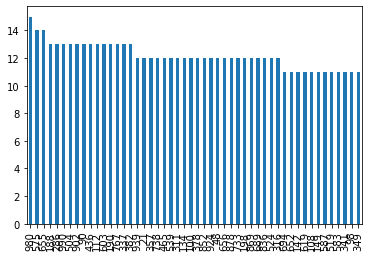

In [ ]:
# 7.3
helvetica_update.head(50).plot.bar() 
plt.set_title('Helvetica update')
print(f'The 000 value is used only {helvetica_update[000]} times.\n')

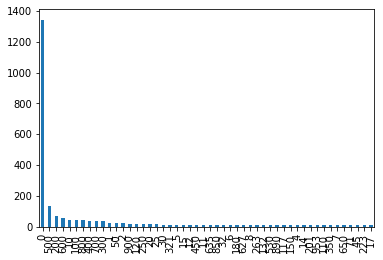

In [ ]:
# 7.3
arial_baseline.head(50).plot.bar() 
plt.set_title('Arial baseline')


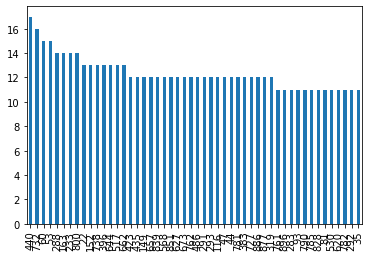

In [ ]:
# 7.3
arial_update.head(50).plot.bar() 
plt.set_title('Arial update')


## 7.4

**Expectation**:
In the case both Helvetica and Arial were originated from real odometer readings, we would expect:
- the mean and the standard deviation of the baseline_motorycle1 to be the same in both Helvetica and Arial
- the last three digits of the kilometrage to be rounded as a human would do. So we expect the most used last three digits to be '000','500','x00', and the other ones to be really rare. 

**Observation**:
The observation we made with the plots are:
- the mean and the standard deviation in the Helvetica case is very similar to Arial one
- the distribution of the last digits is very different: in the Arial baseline case we have a spike in '000' as we would expect and some minor peaks (**e.g**: '500','200','300',...), whereas in the Helvetica and Arial updated case we have a uniform-like distribution among all possible values without any emphasis on the rounded values.

**Conclusion**:
We can conclude with a good confidence that the rows with Helvetica font and the updated values of the Arial font were fabricated by using a random generator with the same mean and variance as the Arial baseline. This explains why the mean and the standard deviation are still the same, and why the last three digits are not rounded as we would expect.


### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

Dear Your Boss,

In the following three points, I explain why and how the supplied dataset could have tampered with. I also draw a short conclusion regarding honesty when signing at the top or the bottom of the form.

- The driven miles since the baseline measurement is uniformly distributed. See plot in task 5.2. This is expected to be a right-skewed normal distribution since people tend to have driven a lower number of miles than a high number of miles. Furthermore, the distributions of the last three digits in the baseline and updated reported miles are different. In the baseline distribution people are heavily biased to enter the last three digits like 000, 100, 200 etc. The distribution for the updated report is uniform where the selection of the popular digits seem arbitrary. One can also separate the data on fonts: Both the baseline and updated Helvetica last three digits are uniformly distributed. Only the Arial baseline report has a human-like selection of the last three digits.  The p value from the t-test is also suspiciously low (1e-52).
- Half of the data is completely fabricated: The Helvetica font data is very unlikely to have been entered by a person and must have been randomized. The updated Arial mileage is also fabricated. This fabrication has probably been performed by creating a fake Helvetica baseline dataset with the same mean and variance as the Arial baseline. Further, the increase of mileage to the updated policy is simply addition of a number from an almost uniform distribution between 0 and 50,000 to the baseline mileages. This would explain the extremely low p value for the significance of the different means.
- *Disregarding tampering* we can see a significant difference between mileages in the top and bottom sign cases. The significance level p is extremely low (p > 1e-52). The result shows that people report a lower mileage when signing at the top. *However*, If the hypothesis of data tampering is true, no conclusion can be drawn.

Best regards,\
Mario Parksson\
Data Scientist @ Arcadily